<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/House_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("House_Rent_Dataset.csv")

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [ ]:
df.shape

(4746, 12)

In [ ]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Posted On,0
BHK,0
Rent,5
Size,8
Floor,0
Area Type,7
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4741 non-null   float64
 3   Size               4738 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4739 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4742 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Floor'].nunique()

480

In [ ]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 1', 'Ground out of 3', '4 out of 5',
       '2 out of 3', '2 out of 2', '2 out of 5', '4 out of 14',
       '3 out of 3', '5 out of 5', '4 out of 4', '7 out of 8',
       '1 out of 4', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [ ]:
df['CurrentFloor'] = df['Floor'].apply(lambda x:str(x).split(' ')[0])
df['CurrentFloor'].value_counts()

,count
CurrentFloor,
1,1151
2,944
Ground,918
3,512
4,272
5,164
6,93
7,74
10,67


In [ ]:
df['TotalFloor'] = df['Floor'].apply(lambda x:str(x).split(' ')[-1])
df['TotalFloor'].value_counts()

,count
TotalFloor,
4,936
3,913
2,857
5,422
1,330
...,...
54,1
85,1
71,1


In [ ]:
def transFloorCur(x):
  if x=='Ground':
    return 0
  elif x=='Upper':
    return -1
  elif x=='Lower':
    return -2
  elif x.isdigit():
    return int(x)
  else:
    return np.non

df['CurrentFloor'] = df['CurrentFloor'].apply(lambda x: transFloorCur(x))

In [ ]:
df['CurrentFloor' ].unique()

array([ 0,  1,  4,  2,  3,  5,  7,  8, -1, 11, -2,  6, 14, 43, 13, 18, 17,
        9, 19, 60, 34, 12, 26, 25, 53, 16, 10, 39, 32, 47, 28, 20, 15, 65,
       40, 37, 22, 21, 30, 35, 33, 44, 41, 46, 27, 45, 48, 50, 24, 23, 29,
       49, 36, 76])

In [ ]:
df['CurrentFloor' ].nunique()

54

In [ ]:
df['CurrentFloor']   = df['CurrentFloor'].astype('Int64')

In [ ]:
df['CurrentFloor' ].unique()

<IntegerArray>
[ 0,  1,  4,  2,  3,  5,  7,  8, -1, 11, -2,  6, 14, 43, 13, 18, 17,  9, 19,
 60, 34, 12, 26, 25, 53, 16, 10, 39, 32, 47, 28, 20, 15, 65, 40, 37, 22, 21,
 30, 35, 33, 44, 41, 46, 27, 45, 48, 50, 24, 23, 29, 49, 36, 76]
Length: 54, dtype: Int64

In [ ]:
df['TotalFloor'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34',
       'Ground'], dtype=object)

In [ ]:
df['TotalFloor'] = df['TotalFloor'].replace({'Ground' : '0'})

In [ ]:
df['TotalFloor'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', '0'],
      dtype=object)

In [ ]:
df.isna().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [ ]:
df['TotalFloor']   = df['TotalFloor'].astype('Int64')

In [ ]:
df['TotalFloor'].unique()

<IntegerArray>
[ 2,  3,  1,  4,  5, 14,  8,  6, 19, 10,  7, 13, 78, 18, 12, 24, 31, 21, 23,
 20,  9, 22, 58, 16, 66, 48, 40, 44, 42, 41, 60, 32, 30, 29, 89, 15, 11, 28,
 17, 45, 35, 75, 38, 51, 43, 25, 27, 26, 76, 36, 37, 55, 68, 77, 50, 59, 62,
 39, 52, 54, 33, 46, 85, 71, 81, 34,  0]
Length: 67, dtype: Int64

In [ ]:
df.drop('Floor' , axis=1 , inplace=True )

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom,CurrentFloor,TotalFloor
count,4726.000000,4.726000e+03,4726.000000,4726.000000,4726.0,4726.0
mean,2.084215,3.507959e+04,968.290309,1.967626,3.448159,6.98942
std,0.832728,7.825741e+04,634.852453,0.885156,5.783077,9.481672
min,1.000000,1.200000e+03,10.000000,1.000000,-2.0,0.0
25%,2.000000,1.000000e+04,550.000000,1.000000,1.0,2.0
50%,2.000000,1.600000e+04,850.000000,2.000000,2.0,4.0
75%,3.000000,3.300000e+04,1200.000000,2.000000,3.0,6.0
max,6.000000,3.500000e+06,8000.000000,10.000000,76.0,89.0


<Axes: xlabel='Size', ylabel='Rent'>

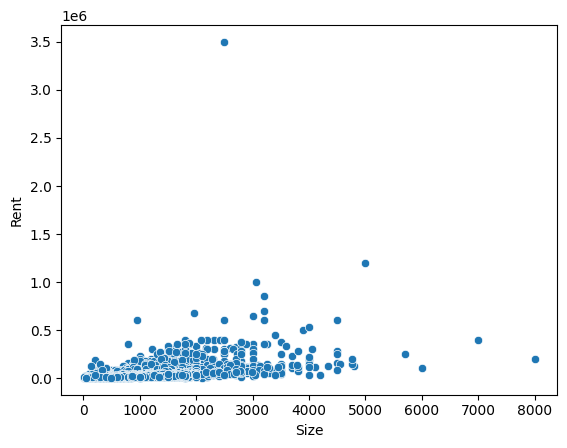

In [ ]:
sns.scatterplot(data=df , x='Size' , y='Rent')

<Axes: xlabel='Bathroom', ylabel='Rent'>

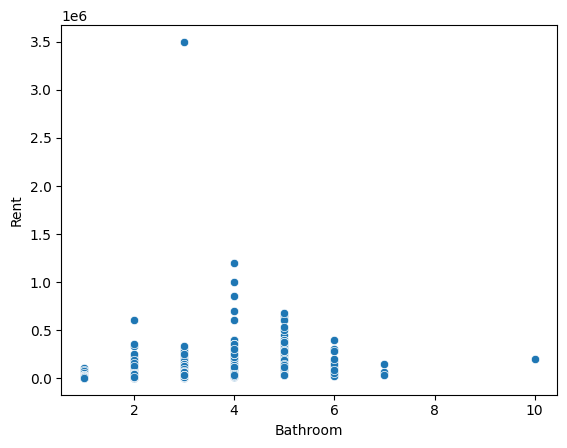

In [ ]:
sns.scatterplot(data=df , x='Bathroom' , y='Rent')

<Axes: xlabel='TotalFloor'>

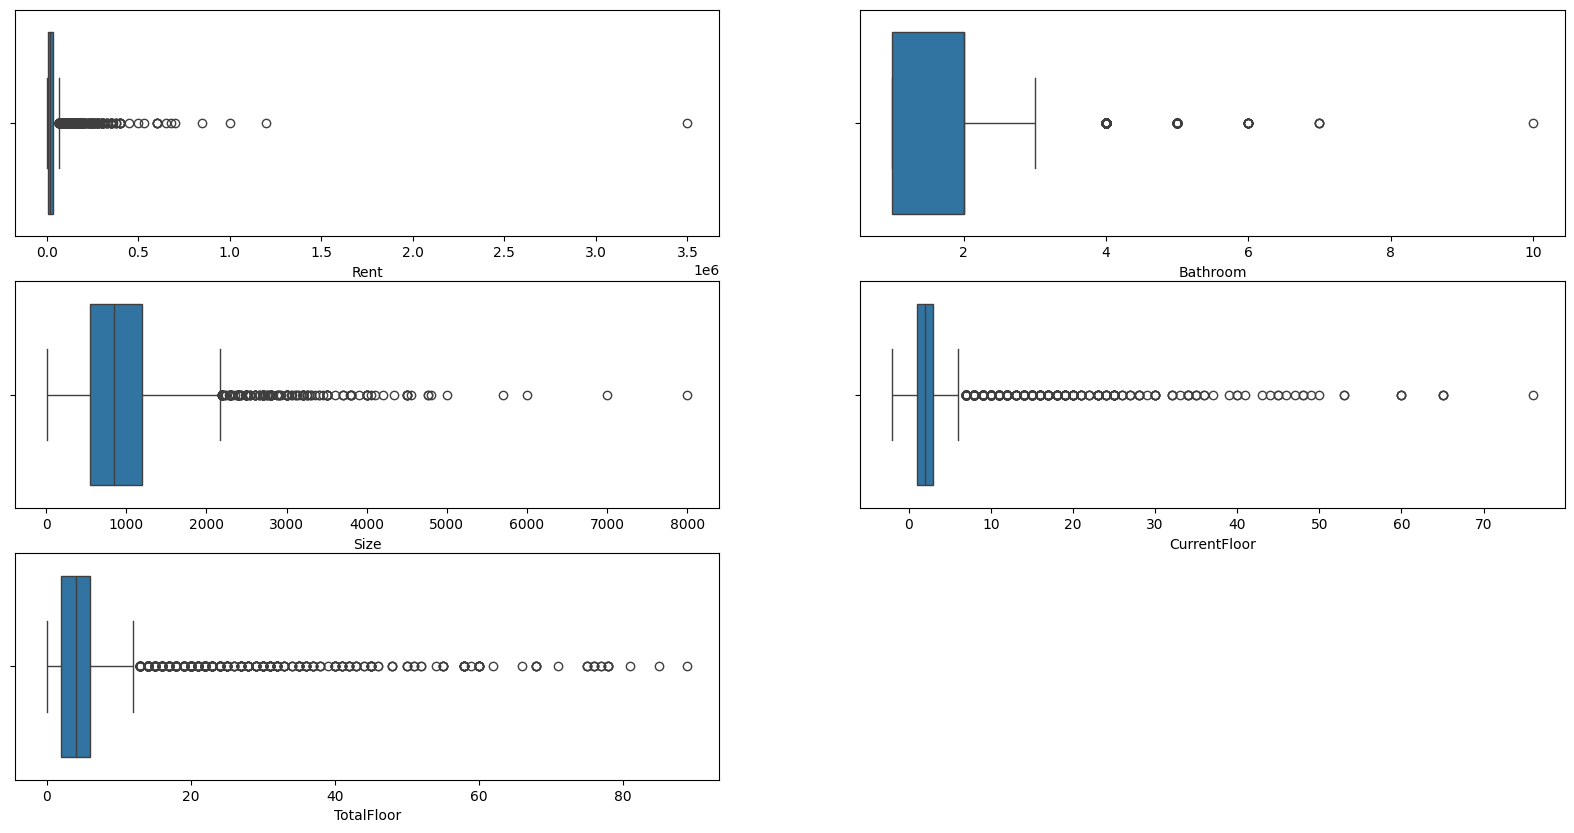

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.boxplot(data = df , x = 'Rent')
plt.subplot(3,2,2)
sns.boxplot(data = df , x = 'Bathroom')
plt.subplot(3,2,3)
sns.boxplot(data = df , x = 'Size')
plt.subplot(3,2,4)
sns.boxplot(data = df , x = 'CurrentFloor')
plt.subplot(3,2,5)
sns.boxplot(data = df , x = 'TotalFloor')

In [ ]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['Rent', 'Bathroom', 'Size', 'CurrentFloor', 'TotalFloor']:
    df = outliers(df, col)

In [ ]:
df.describe()

,BHK,Rent,Size,Bathroom,CurrentFloor,TotalFloor
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.0,3454.0
mean,1.892878,15722.270990,813.033584,1.698321,1.500579,3.289519
std,0.690502,10345.924571,403.136883,0.630725,1.308209,1.433584
min,1.000000,1500.000000,10.000000,1.000000,-2.0,0.0
25%,1.000000,9000.000000,500.000000,1.000000,0.0,2.0
50%,2.000000,13000.000000,800.000000,2.000000,1.0,3.0
75%,2.000000,19000.000000,1100.000000,2.000000,2.0,4.0
max,6.000000,65000.000000,1950.000000,3.000000,6.0,7.0


<Axes: xlabel='TotalFloor'>

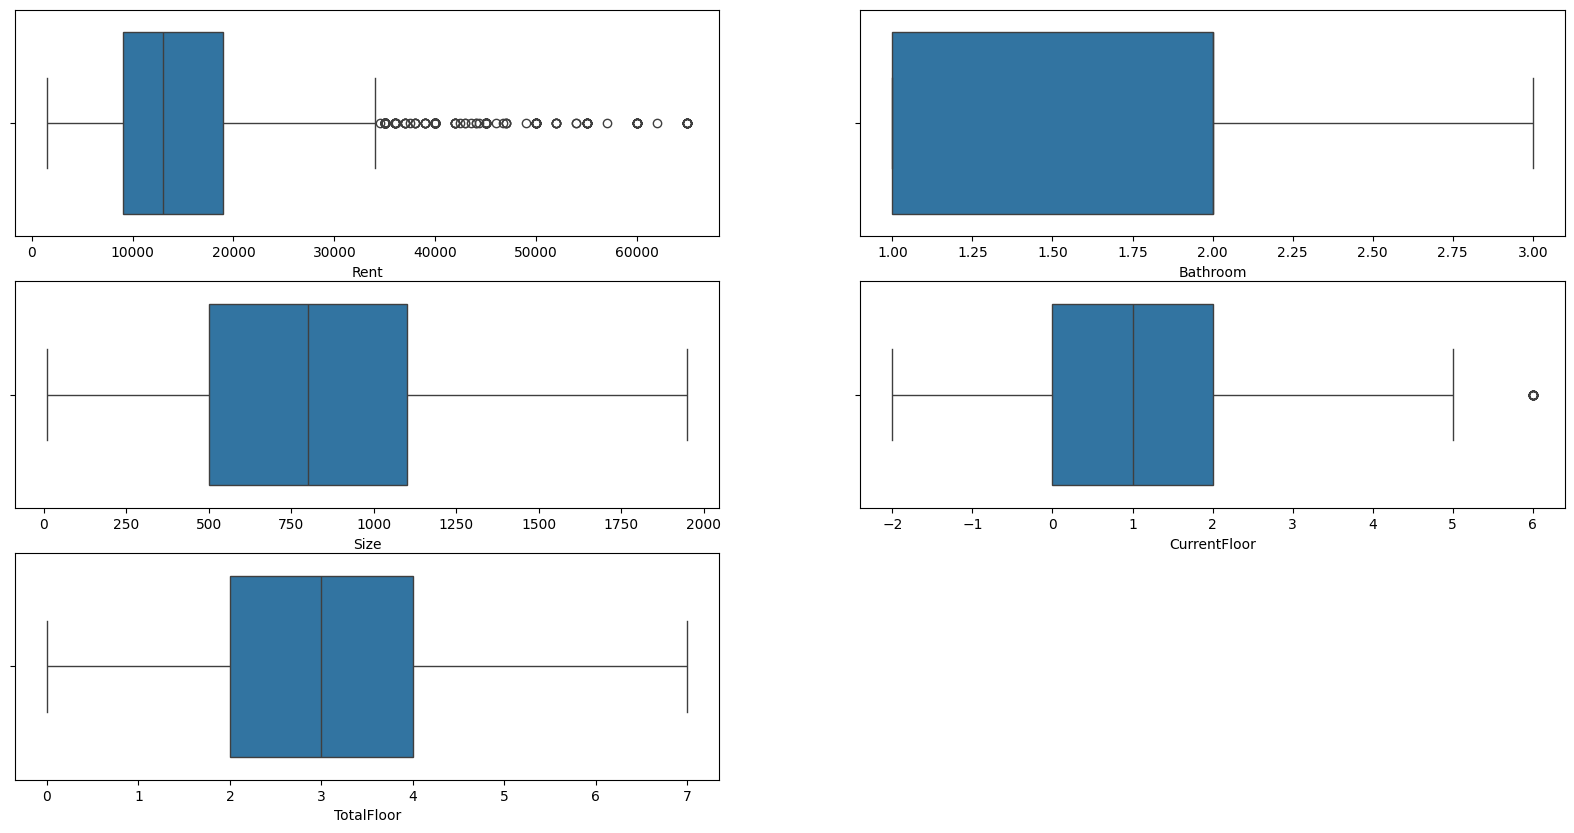

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
sns.boxplot(data = df , x = 'Rent')
plt.subplot(3,2,2)
sns.boxplot(data = df , x = 'Bathroom')
plt.subplot(3,2,3)
sns.boxplot(data = df , x = 'Size')
plt.subplot(3,2,4)
sns.boxplot(data = df , x = 'CurrentFloor')
plt.subplot(3,2,5)
sns.boxplot(data = df , x = 'TotalFloor')

In [ ]:
# x.info()

In [ ]:
from sklearn.preprocessing import label_binarize,OneHotEncoder

colscat = [col for col in df.columns if df[col].dtype == 'O']
colscat.remove('Posted On')

In [ ]:
colscat

['Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [ ]:
colscat.remove('Area Locality')

In [ ]:
en = OneHotEncoder(sparse_output=False , drop='first')
encoder = en.fit_transform(df[colscat])
dfnew = pd.DataFrame(encoder , columns=en.get_feature_names_out(colscat))
df = pd.concat([df.drop(colscat , axis=1).reset_index(drop=True) , dfnew.reset_index(drop=True)],axis=1)

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Area Locality,Bathroom,CurrentFloor,TotalFloor,Area Type_Carpet Area,Area Type_Super Area,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,5/18/2022,2,10000.0,1100.0,Bandel,2.0,0,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,5/16/2022,2,17000.0,1000.0,Salt Lake City Sector 2,1.0,1,3,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,5/9/2022,2,7500.0,850.0,South Dum Dum,1.0,1,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4/29/2022,2,7000.0,600.0,Thakurpukur,2.0,0,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,6/21/2022,2,10000.0,700.0,Malancha,2.0,0,4,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Locality', 'Bathroom',
       'CurrentFloor', 'TotalFloor', 'Area Type_Carpet Area',
       'Area Type_Super Area', 'City_Chennai', 'City_Delhi', 'City_Hyderabad',
       'City_Kolkata', 'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')

In [ ]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['year'] = df['Posted On'].dt.year
df['month'] = df['Posted On'].dt.month
df['week'] = df['Posted On'].dt.weekday
df['day'] = df['Posted On'].dt.day

In [ ]:
df.nunique()

,0
Posted On,80
BHK,6
Rent,150
Size,366
Area Locality,1659
Bathroom,3
CurrentFloor,9
TotalFloor,8
Area Type_Carpet Area,2
Area Type_Super Area,2


In [ ]:
colscat

['Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Area Locality,Bathroom,CurrentFloor,TotalFloor,Area Type_Carpet Area,Area Type_Super Area,...,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,year,month,week,day
0,2022-05-18,2,10000.0,1100.0,Bandel,2.0,0,2,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2022,5,2,18
1,2022-05-16,2,17000.0,1000.0,Salt Lake City Sector 2,1.0,1,3,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,2022,5,0,16
2,2022-05-09,2,7500.0,850.0,South Dum Dum,1.0,1,2,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2022,5,0,9
3,2022-04-29,2,7000.0,600.0,Thakurpukur,2.0,0,1,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2022,4,4,29
4,2022-06-21,2,10000.0,700.0,Malancha,2.0,0,4,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2022,6,1,21


In [ ]:
df['year'].value_counts()

,count
year,
2022,3454


In [ ]:
df.drop('year' , axis=1 , inplace=True)

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Area Locality,Bathroom,CurrentFloor,TotalFloor,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,month,week,day
0,2022-05-18,2,10000.0,1100.0,Bandel,2.0,0,2,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5,2,18
1,2022-05-16,2,17000.0,1000.0,Salt Lake City Sector 2,1.0,1,3,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,5,0,16
2,2022-05-09,2,7500.0,850.0,South Dum Dum,1.0,1,2,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5,0,9
3,2022-04-29,2,7000.0,600.0,Thakurpukur,2.0,0,1,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4,4,29
4,2022-06-21,2,10000.0,700.0,Malancha,2.0,0,4,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,1,21


In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['Rent' , 'Area Locality', 'Posted On'] , axis=1)
y = df['Rent']

xtrain , xtest , ytrain , ytest = train_test_split(x,y , random_state=40 , test_size=0.2)

In [ ]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape

((2763, 21), (691, 21), (2763,), (691,))

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = x.select_dtypes(include=['int64', 'float64']).columns

scl = StandardScaler()
xtrain[num_cols] = scl.fit_transform(xtrain[num_cols])
xtest[num_cols] = scl.transform(xtest[num_cols])

In [ ]:
xtrain.head()

,BHK,Size,Bathroom,CurrentFloor,TotalFloor,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,...,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,month,week,day
2385,1.615720,1.672965,2.108924,-0.379419,0.508157,-0.795600,0.796813,1.933722,-0.425170,-0.510948,...,-0.26083,1.058533,-0.843739,0.544028,-0.265547,-0.019028,0.449251,7,4,1
1601,0.162992,-0.393339,0.505027,-1.144626,-0.194564,1.256914,-1.254999,-0.517137,2.352002,-0.510948,...,-0.26083,1.058533,-0.843739,0.544028,-0.265547,-0.019028,0.449251,5,3,12
2471,1.615720,0.984197,0.505027,-0.379419,-1.600006,1.256914,-1.254999,1.933722,-0.425170,-0.510948,...,-0.26083,1.058533,-0.843739,-1.838141,-0.265547,-0.019028,0.449251,6,1,7
1602,1.615720,0.358044,0.505027,1.150996,1.210878,1.256914,-1.254999,-0.517137,2.352002,-0.510948,...,-0.26083,1.058533,-0.843739,-1.838141,-0.265547,-0.019028,0.449251,6,5,18
3086,-1.289736,-1.019492,-1.098870,-1.144626,-0.194564,-0.795600,0.796813,-0.517137,-0.425170,1.957146,...,-0.26083,-0.944704,1.185200,0.544028,-0.265547,-0.019028,0.449251,6,1,14


In [ ]:
from sklearn.tree import DecisionTreeRegressor
ds = DecisionTreeRegressor(random_state=40)
ds.fit(xtrain , ytrain)

ypred = ds.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error
r2 = r2_score(ytest , ypred)
mae = mean_absolute_error(ytest , ypred)


print(f'r^2 : {r2}' , f'MAE : {mae}')

r^2 : 0.4528724596633644 MAE : 5530.498311625663


In [ ]:
from sklearn.linear_model import LinearRegression

lb = LinearRegression()
lb.fit(xtrain , ytrain)
ypred = lb.predict(xtest)

In [ ]:
from sklearn.linear_model import Lasso , Ridge

s =lb.score(xtrain , ytrain)

In [ ]:
print(s)

0.6185028921385869


In [ ]:
print(r2_score(ytest , ypred))

0.5823711883048828


In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMAE' : np.sqrt(mean_absolute_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE       RMAE
0  0.582371  4518.026057  4.839065e+07  67.216263


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5 , metric='minkowski' , p=1)
knn.fit(xtrain , ytrain)
ypred = knn.predict(xtest)
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMAE' : np.sqrt(mean_absolute_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE       RMAE
0  0.460351  5170.257887  6.252915e+07  71.904505


Text(0.5, 1.0, 'Accuracy vs K')

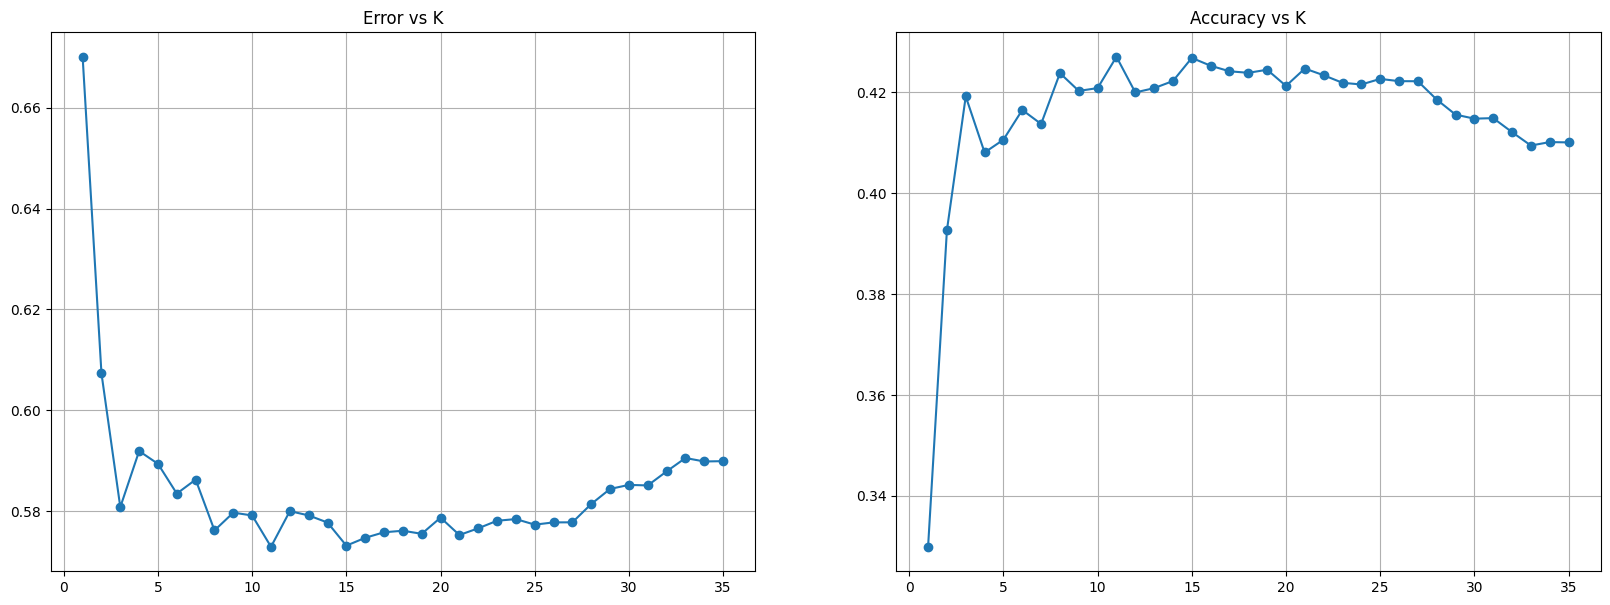

In [ ]:
k = 35
error = []
accuracy = []

for i in range(1, k+1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(xtrain , ytrain)
  ypred = knn.predict(xtest)
  error.append(1- r2_score(ytest , ypred))
  accuracy.append(r2_score(ytest , ypred))


plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,36) , error , marker='o')
plt.grid()
plt.title('Error vs K')

plt.subplot(1,2,2)
plt.plot(range(1,36) , accuracy , marker='o')
plt.grid()
plt.title('Accuracy vs K')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=11 , metric='minkowski' , p=1)
knn.fit(xtrain , ytrain)
ypred = knn.predict(xtest)
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMAE' : np.sqrt(mean_absolute_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE       RMAE
0  0.451413  5067.532167  6.356477e+07  71.186601


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear' , C = 100 , gamma=1)
svr.fit(xtrain , ytrain)
ypred = svr.predict(xtest)
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMAE' : np.sqrt(mean_absolute_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE      RMAE
0  0.529547  4471.826897  5.451140e+07  66.87172


In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf' , C = 0.1 , gamma=60)
svr.fit(xtrain , ytrain)
ypred = svr.predict(xtest)
dict = {'R2' : r2_score(ytest , ypred) ,
        'MAE' : mean_absolute_error(ytest , ypred) ,
        'MSE' : mean_squared_error(ytest , ypred) ,
        'RMAE' : np.sqrt(mean_absolute_error(ytest , ypred))}

temp = pd.DataFrame(dict, index=[0])
print(temp)

         R2          MAE           MSE       RMAE
0 -0.133258  7463.374539  1.313107e+08  86.390824
